# Install the right version of Tensorflow

In [67]:
!pip install tensorflow==2.15.1
!pip install keras-utils

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Enter the path of your root directory here

In [3]:
#Enter the path of your root directory here
root_dir = "/content/drive/MyDrive/"

In [4]:
dir = root_dir+"U-Net ad-hoc Reconstruction/"
os.chdir(dir)

In [5]:
!pwd

/content/drive/MyDrive/U-Net ad-hoc Reconstruction


# Visualizing the input data

In [6]:
out_path = root_dir+"Input Data"

path = os.path.join(out_path,"final_images.npy")
final_images = np.load(path)

path = os.path.join(out_path,"final_masks.npy")
final_masks = np.load(path)

path = os.path.join(out_path,"final_TE_masks.npy")
final_TE_masks = np.load(path)

path = os.path.join(out_path,"final_Freq_masks.npy")
final_Freq_masks = np.load(path)

print(final_images.shape)
print(final_masks.shape)
print(final_TE_masks.shape)
print(final_Freq_masks.shape)

(4, 256, 256, 6)
(4, 256, 256)
(4, 256, 256, 3)
(4, 256, 256, 3)


### Input Magntiude Image

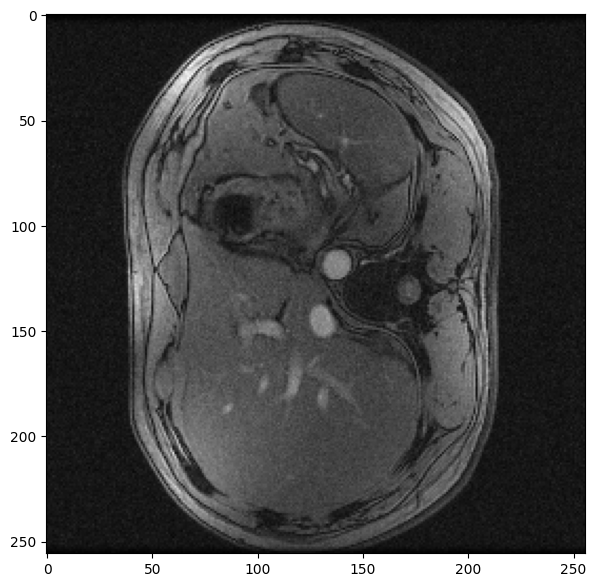

In [7]:
plt.figure(figsize=(7,7))
plt.imshow(final_images[1,:,:,2],cmap="gray")

### Input Phase Image

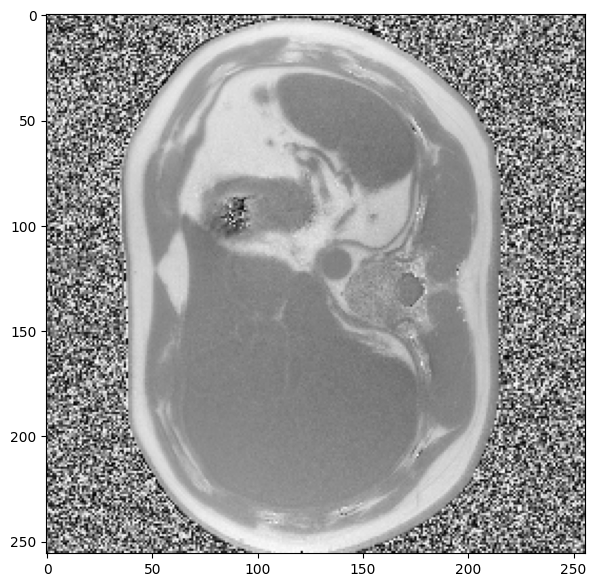

In [8]:
plt.figure(figsize=(7,7))
plt.imshow(final_images[1,:,:,4],cmap="gray")

### Input Time for Echo (TE) Values

In [9]:
print(final_TE_masks[2,100:150,100:150,2])

[[0.003772 0.003772 0.003772 ... 0.003772 0.003772 0.003772]
 [0.003772 0.003772 0.003772 ... 0.003772 0.003772 0.003772]
 [0.003772 0.003772 0.003772 ... 0.003772 0.003772 0.003772]
 ...
 [0.003772 0.003772 0.003772 ... 0.003772 0.003772 0.003772]
 [0.003772 0.003772 0.003772 ... 0.003772 0.003772 0.003772]
 [0.003772 0.003772 0.003772 ... 0.003772 0.003772 0.003772]]


### Input Frequency Values

In [10]:
print(final_Freq_masks[2,100:150,100:150,0])

[[-440. -440. -440. ... -440. -440. -440.]
 [-440. -440. -440. ... -440. -440. -440.]
 [-440. -440. -440. ... -440. -440. -440.]
 ...
 [-440. -440. -440. ... -440. -440. -440.]
 [-440. -440. -440. ... -440. -440. -440.]
 [-440. -440. -440. ... -440. -440. -440.]]


# Run the U-Net Ad-hoc Reconstruction

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python main.py $root_dir output_data.mat

Streaming output truncated to the last 5000 lines.
Epoch 8752/10000
1/2 [==============>...............] - ETA: 0s - loss: 6.1537
Epoch 8752: loss did not improve from 5.96841
2/2 [==============================] - 0s 29ms/step - loss: 6.0361 - lr: 1.0000e-04
Epoch 8753/10000
1/2 [==============>...............] - ETA: 0s - loss: 5.4317
Epoch 8753: loss did not improve from 5.96841
2/2 [==============================] - 0s 26ms/step - loss: 5.9686 - lr: 1.0000e-04
Epoch 8754/10000
1/2 [==============>...............] - ETA: 0s - loss: 6.5052
Epoch 8754: loss did not improve from 5.96841
2/2 [==============================] - 0s 26ms/step - loss: 5.9709 - lr: 1.0000e-04
Epoch 8755/10000
1/2 [==============>...............] - ETA: 0s - loss: 6.1485
Epoch 8755: loss did not improve from 5.96841
2/2 [==============================] - 0s 26ms/step - loss: 6.0392 - lr: 1.0000e-04
Epoch 8756/10000
1/2 [==============>...............] - ETA: 0s - loss: 5.9235
Epoch 8756: loss did not improve f

# Visualize the output

In [11]:
print(dir)

/content/drive/MyDrive/U-Net ad-hoc Reconstruction/


In [12]:
from scipy.io import loadmat
out_dir = dir+"output_data.mat"
preds = loadmat(out_dir)['test_pd']
masks = loadmat(out_dir)['mask']

fat_maps = preds[:,:,:,1]
water_maps = preds[:,:,:,0]

fat_maps = np.array(fat_maps, dtype = np.float64)
water_maps = np.array(water_maps, dtype = np.float64)

In [13]:
#Normalizing the Fat-Water maps in range 0 to 255
for i in range(0,fat_maps.shape[0]):
    fat_maps[i,:,:] = (fat_maps[i,:,:]-np.min(fat_maps[i,:,:]))/(np.max(fat_maps[i,:,:])-np.min(fat_maps[i,:,:]))
    fat_maps[i,:,:] = fat_maps[i,:,:]*255

    water_maps[i,:,:] = (water_maps[i,:,:]-np.min(water_maps[i,:,:]))/(np.max(water_maps[i,:,:])-np.min(water_maps[i,:,:]))
    water_maps[i,:,:] = water_maps[i,:,:]*255

In [14]:
# Apply masks which are obtained from Otsu's thresholding to set background to zero intensity.
fat_maps = np.multiply(fat_maps,masks)
water_maps = np.multiply(water_maps,masks)

# Output Fat Map from U-Net

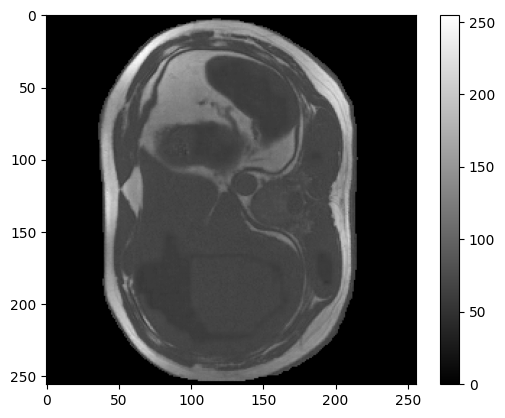

In [15]:
# Display a Fat map
item = 2
temp = np.squeeze(fat_maps[item,:,:])
plt.imshow(temp,cmap="gray")
plt.colorbar()

# Output Water map from U-Net

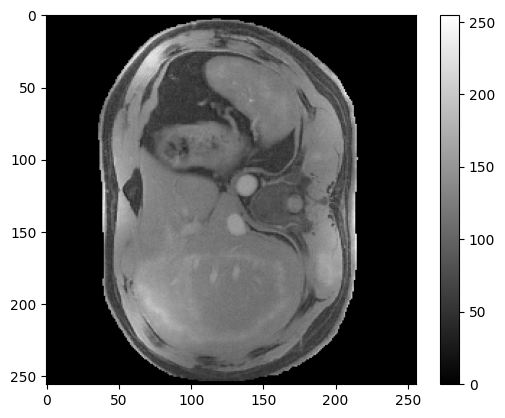

In [16]:
# Display a Fat map
item = 2
temp = np.squeeze(water_maps[item,:,:])
plt.imshow(temp,cmap="gray")
plt.colorbar()

# Load and display the Ground Truth Fat-Water maps

In [17]:
GT_dir = root_dir+"Ground Truth"

GT_path_Fat = GT_dir+"/Fat_m.mat"
GT_path_Water = GT_dir+"/Water_m.mat"

GT_Fat=loadmat(GT_path_Fat)['WATER_m']
GT_water=loadmat(GT_path_Water)['FAT_m']

GT_Fat = np.array(GT_Fat, dtype = np.float64)
GT_water = np.array(GT_water, dtype = np.float64)

GT_Fat = np.swapaxes(GT_Fat,2,1)
GT_Fat = np.swapaxes(GT_Fat,0,1)

GT_water = np.swapaxes(GT_water,2,1)
GT_water = np.swapaxes(GT_water,0,1)

print(GT_Fat.shape)
print(GT_water.shape)

#Normalizing the Ground Truth Fat-Water maps in range 0 to 255
for i in range(0,fat_maps.shape[0]):
    GT_water[i,:,:] = (GT_water[i,:,:]-np.min(GT_water[i,:,:]))/(np.max(GT_water[i,:,:])-np.min(GT_water[i,:,:]))
    GT_water[i,:,:] = GT_water[i,:,:]*255
    GT_Fat[i,:,:] = (GT_Fat[i,:,:]-np.min(GT_Fat[i,:,:]))/(np.max(GT_Fat[i,:,:])-np.min(GT_Fat[i,:,:]))
    GT_Fat[i,:,:] = GT_Fat[i,:,:]*255

# Apply masks which are obtained from Otsu's thresholding to set background to zero intensity.
GT_Fat = np.multiply(GT_Fat,masks)
GT_water = np.multiply(GT_water,masks)

(4, 256, 256)
(4, 256, 256)


# Ground Truth Fat map

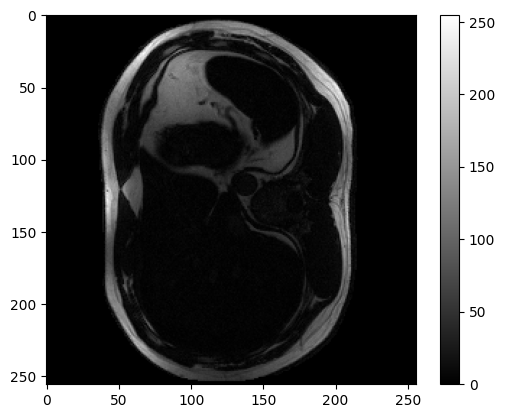

In [18]:
# Display a sample Ground Truth Fat map
item = 2
temp = np.squeeze(GT_Fat[item,:,:])

plt.imshow(temp,cmap="gray")
plt.colorbar()

# Ground Truth Water map

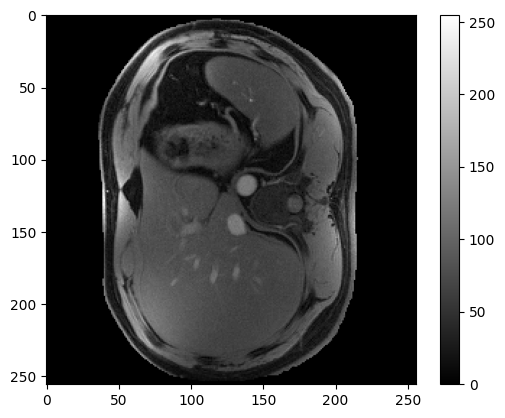

In [19]:
# Display a sample Ground Truth Water map
item = 2
temp = np.squeeze(GT_water[item,:,:])

plt.imshow(temp,cmap="gray")
plt.colorbar()

# Computing the NRMSE between the Fat-Water maps of the U-Net and Ground Truth

In [20]:
import cv2
def mse(img1, img2):
    h, w = img1.shape
    diff = cv2.subtract(img1, img2)
    err = np.sum(diff**2)
    mse = err/(float(h*w))
    mse = np.sqrt(mse)
    return mse

In [21]:
final_mse = []

#Slice-wise NRMSE
for i in range(0,GT_Fat.shape[0]):
    GT_Fat_pt = np.squeeze(GT_Fat[i,:,:])
    PD_Fat_pt = np.squeeze(fat_maps[i,:,:])
    temp_mse = mse(GT_Fat_pt, PD_Fat_pt)
    print(temp_mse)
    final_mse.append(temp_mse)

print("Average RMSE in Fat Images:")
final_mse = np.array(final_mse)
final_mse = np.average(final_mse)
print(final_mse)

55.58663598142798
48.17653841745009
44.83748092904146
52.44141178662721
Average RMSE in Fat Images:
50.260516778636685


In [22]:
final_mse = []

#Slice-wise NRMSE
for i in range(0,GT_Fat.shape[0]):
    GT_Water_pt = np.squeeze(GT_water[i,:,:])
    PD_Water_pt = np.squeeze(water_maps[i,:,:])
    temp_mse = mse(GT_Water_pt,PD_Water_pt)
    print(temp_mse)
    final_mse.append(temp_mse)

print("Average RMSE in Water Images:")
final_mse = np.array(final_mse)
final_mse = np.average(final_mse)
print(final_mse)

29.986410907359996
30.850026598354457
35.03259877036592
31.197630863133682
Average RMSE in Water Images:
31.766666784803515


# Run the DCCN ad-hoc reconstruction

In [24]:
dir = root_dir+"DCCN ad-hoc Reconstruction/"

In [25]:
os.chdir(dir)

In [26]:
!pwd

/content/drive/MyDrive/DCCN ad-hoc Reconstruction


In [10]:
!CUDA_VISIBLE_DEVICES=0 python main.py $root_dir output_data.mat

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - ETA: 0s - loss: 7.6333
Epoch 3752: loss improved from 7.63335 to 7.63327, saving model to batch_DCCNsaved_weights.hdf5
1/1 [==============================] - 1s 902ms/step - loss: 7.6333 - lr: 1.0000e-04
Epoch 3753/5000
1/1 [==============================] - ETA: 0s - loss: 7.6332
Epoch 3753: loss improved from 7.63327 to 7.63318, saving model to batch_DCCNsaved_weights.hdf5
1/1 [==============================] - 1s 810ms/step - loss: 7.6332 - lr: 1.0000e-04
Epoch 3754/5000
1/1 [==============================] - ETA: 0s - loss: 7.6331
Epoch 3754: loss improved from 7.63318 to 7.63310, saving model to batch_DCCNsaved_weights.hdf5
1/1 [==============================] - 1s 790ms/step - loss: 7.6331 - lr: 1.0000e-04
Epoch 3755/5000
1/1 [==============================] - ETA: 0s - loss: 7.6331
Epoch 3755: loss improved from 7.63310 to 7.63305, saving model to batch_DCCNsaved_weights.hdf5
1/1 [=========

# Visualizing the outputs from DCCN

In [28]:
from scipy.io import loadmat
path = dir+"/output_data.mat"

preds_real = loadmat(path)['test_pd_real']
print(preds_real.shape)

preds_imag = loadmat(path)['test_pd_imag']
print(preds_imag.shape)

masks = loadmat(path)['mask']
print(masks.shape)

preds = np.sqrt(np.square(preds_real) + np.square(preds_imag))  #Real and Imaginary output maps are combined

fat_maps = preds[:,:,:,1]
water_maps = preds[:,:,:,0]


(4, 256, 256, 4)
(4, 256, 256, 4)
(4, 256, 256)


In [29]:
#Normalizing the Fat-Water maps in range 0 to 255
for i in range(0,fat_maps.shape[0]):
    fat_maps[i,:,:] = (fat_maps[i,:,:]-np.min(fat_maps[i,:,:]))/(np.max(fat_maps[i,:,:])-np.min(fat_maps[i,:,:]))
    fat_maps[i,:,:] = fat_maps[i,:,:]*255

    water_maps[i,:,:] = (water_maps[i,:,:]-np.min(water_maps[i,:,:]))/(np.max(water_maps[i,:,:])-np.min(water_maps[i,:,:]))
    water_maps[i,:,:] = water_maps[i,:,:]*255

In [30]:
# Apply masks which are obtained from Otsu's thresholding to set background to zero intensity.
fat_maps = np.multiply(fat_maps,masks)
water_maps = np.multiply(water_maps,masks)

# Output Fat map from DCCN

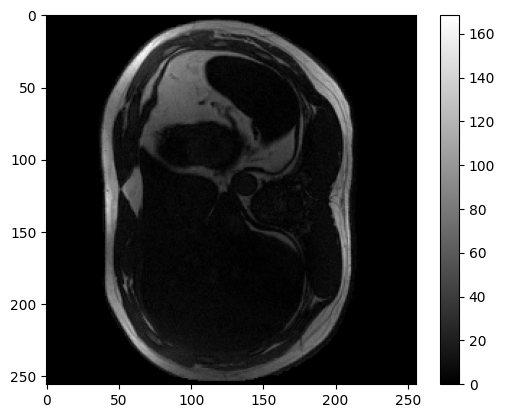

In [31]:
# Display a sample Fat map
item = 2
temp = np.squeeze(fat_maps[item,:,:])
plt.imshow(temp,cmap="gray")
plt.colorbar()

# Output Water map from DCCN

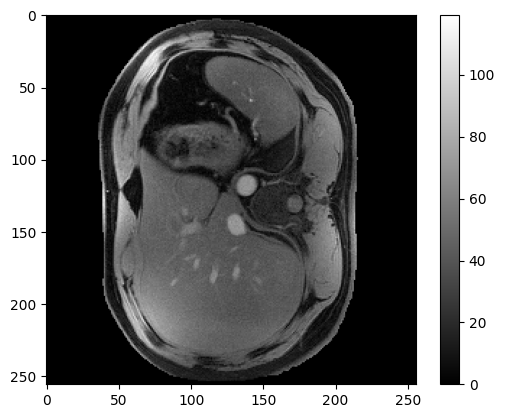

In [32]:
item = 2
temp = np.squeeze(water_maps[item,:,:])

plt.imshow(temp,cmap="gray")
plt.colorbar()

# Load and display the Ground Truth Fat-Water maps

In [33]:
GT_dir = root_dir+"Ground Truth"

GT_path_Fat = GT_dir+"/Fat_m.mat"
GT_path_Water = GT_dir+"/Water_m.mat"

GT_Fat=loadmat(GT_path_Fat)['WATER_m']
GT_water=loadmat(GT_path_Water)['FAT_m']

GT_Fat = np.array(GT_Fat, dtype = np.float64)
GT_water = np.array(GT_water, dtype = np.float64)

GT_Fat = np.swapaxes(GT_Fat,2,1)
GT_Fat = np.swapaxes(GT_Fat,0,1)

GT_water = np.swapaxes(GT_water,2,1)
GT_water = np.swapaxes(GT_water,0,1)

print(GT_Fat.shape)
print(GT_water.shape)

#Normalizing the Ground Truth Fat-Water maps in range 0 to 1
for i in range(0,fat_maps.shape[0]):
    GT_water[i,:,:] = (GT_water[i,:,:]-np.min(GT_water[i,:,:]))/(np.max(GT_water[i,:,:])-np.min(GT_water[i,:,:]))
    GT_water[i,:,:] = GT_water[i,:,:]*255
    GT_Fat[i,:,:] = (GT_Fat[i,:,:]-np.min(GT_Fat[i,:,:]))/(np.max(GT_Fat[i,:,:])-np.min(GT_Fat[i,:,:]))
    GT_Fat[i,:,:] = GT_Fat[i,:,:]*255

# Apply masks which are obtained from Otsu's thresholding to set background to zero intensity.
GT_Fat = np.multiply(GT_Fat,masks)
GT_water = np.multiply(GT_water,masks)

(4, 256, 256)
(4, 256, 256)


In [34]:
import cv2
def mse(img1, img2):
    h, w = img1.shape
    diff = cv2.subtract(img1, img2)
    err = np.sum(diff**2)
    mse = err/(float(h*w))
    mse = np.sqrt(mse)
    return mse

In [35]:
final_mse = []

#Slice-wise NRMSE
for i in range(0,GT_Fat.shape[0]):
    GT_Fat_pt = np.squeeze(GT_Fat[i,:,:])
    PD_Fat_pt = np.squeeze(fat_maps[i,:,:])
    temp_mse = mse(GT_Fat_pt, PD_Fat_pt)
    print(temp_mse)
    final_mse.append(temp_mse)

print("Average RMSE in Fat Images:")
final_mse = np.array(final_mse)
final_mse = np.average(final_mse)
print(final_mse)

10.596934344232523
11.54930739392375
14.825066173034877
14.291974532062747
Average RMSE in Fat Images:
12.815820610813473


In [36]:
final_mse = []

#Slice-wise NRMSE
for i in range(0,GT_Fat.shape[0]):
    GT_Water_pt = np.squeeze(GT_water[i,:,:])
    PD_Water_pt = np.squeeze(water_maps[i,:,:])
    temp_mse = mse(GT_Water_pt,PD_Water_pt)
    print(temp_mse)
    final_mse.append(temp_mse)

print("Average RMSE in Water Images:")
final_mse = np.array(final_mse)
final_mse = np.average(final_mse)
print(final_mse)

26.24693811380969
23.306743351435706
26.86490084242828
26.382392007033353
Average RMSE in Water Images:
25.700243578676755


# Inferences and Conclusion:

## 1. U-Net ad-hoc reconstruction achieved a NRMSE of 50.260 and 31.766 in fat and water maps, respectively.  

## 2. DCCN ad-hoc reconstruction achieved a far-better NRMSE of 12.8150 and 25.700 in fat and water maps, respectively.  

## **With both Quantitative and Qualitative inspection, we can see that the DCCN ad-hoc reconstruction produced better fat-water maps, closer to ground truths.**

## **Also, the DCCN took only 5000 Epochs to converge, whereas the U-Net took 10,000 Epochs.**